In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

38


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/100
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.46545 stdev: 0.15593
Best fitness: 0.81633 - size: (2, 13) - species 1 - id 183
Average adjusted fitness: 0.252
Mean genetic distance 2.896, standard deviation 0.458
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 7.874 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57407 stdev: 0.15461
Best fitness: 0.82004 - size: (3, 15) - species 8 - id 331
Average adjusted fitness: 0.379
Mean genetic distance 2.991, standard deviation 0.470
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 9.787 sec (8.830 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61141 stdev: 0.14921
Best fitness: 0.87508 - size: (4, 15) - species 8 - id 507
Average adjusted fitness: 0.348
Mean genetic distance 3.032, standard deviation 0.497
Population of 206 members in 30 species


Population's average fitness: 0.65901 stdev: 0.18256
Best fitness: 0.88188 - size: (5, 16) - species 34 - id 2423
Average adjusted fitness: 0.505
Mean genetic distance 3.236, standard deviation 0.488
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.510 sec (9.060 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68448 stdev: 0.16899
Best fitness: 0.88435 - size: (5, 18) - species 15 - id 3413
Average adjusted fitness: 0.421
Mean genetic distance 3.220, standard deviation 0.477
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.998 sec (8.818 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.68503 stdev: 0.17140
Best fitness: 0.88435 - size: (5, 18) - species 15 - id 3413
Average adjusted fitness: 0.488
Mean genetic distance 3.245, standard deviation 0.474
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.839 sec (8.399 average)

 ******

Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.430 sec (7.197 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59056 stdev: 0.07134
Best fitness: 0.72294 - size: (5, 19) - species 30 - id 2588
Average adjusted fitness: 0.181
Mean genetic distance 3.226, standard deviation 0.496
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.741 sec (7.263 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59286 stdev: 0.06990
Best fitness: 0.72294 - size: (5, 19) - species 30 - id 2588
Average adjusted fitness: 0.176
Mean genetic distance 3.235, standard deviation 0.493
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.514 sec (7.338 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.58148 stdev: 0.07532
Best fitness: 0.72294 - size: (5, 19) - species 30 - id 2588
Average adjusted fitness: 0.147
Mean genetic distance 

Mean genetic distance 3.196, standard deviation 0.476
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.965 sec (6.784 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65922 stdev: 0.12614
Best fitness: 0.82808 - size: (6, 23) - species 25 - id 1433
Average adjusted fitness: 0.347
Mean genetic distance 3.192, standard deviation 0.478
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 7.075 sec (6.817 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66612 stdev: 0.11715
Best fitness: 0.82808 - size: (6, 23) - species 25 - id 1433
Average adjusted fitness: 0.359
Mean genetic distance 3.193, standard deviation 0.469
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 7.053 sec (6.822 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66688 stdev: 0.11608
Best fitness: 0.82808 - size: (6, 23) - species 25 - id 1433


Total extinctions: 0
Generation time: 6.823 sec (6.814 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62438 stdev: 0.13541
Best fitness: 0.79035 - size: (4, 15) - species 21 - id 1219
Average adjusted fitness: 0.314
Mean genetic distance 3.116, standard deviation 0.476
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 6.517 sec (6.777 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62892 stdev: 0.13081
Best fitness: 0.79035 - size: (4, 15) - species 21 - id 1219
Average adjusted fitness: 0.315
Mean genetic distance 3.114, standard deviation 0.481
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 7.026 sec (6.804 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61428 stdev: 0.14348
Best fitness: 0.79035 - size: (4, 15) - species 40 - id 1219
Average adjusted fitness: 0.320
Mean genetic distance 3.105, standard deviation 0.471
Population 

Population's average fitness: 0.52310 stdev: 0.09476
Best fitness: 0.68213 - size: (3, 14) - species 22 - id 355
Average adjusted fitness: 0.229
Mean genetic distance 3.077, standard deviation 0.514
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.678 sec (5.604 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55592 stdev: 0.08561
Best fitness: 0.68213 - size: (3, 14) - species 22 - id 355
Average adjusted fitness: 0.182
Mean genetic distance 3.172, standard deviation 0.508
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.320 sec (5.842 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56633 stdev: 0.09080
Best fitness: 0.70439 - size: (5, 19) - species 5 - id 627
Average adjusted fitness: 0.217
Mean genetic distance 3.213, standard deviation 0.522
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.465 sec (5.998 average)

 ****** Runni

Population's average fitness: 0.61009 stdev: 0.09619
Best fitness: 0.77304 - size: (9, 27) - species 41 - id 3363
Average adjusted fitness: 0.266
Mean genetic distance 3.312, standard deviation 0.476
Population of 190 members in 37 species
Total extinctions: 0
Generation time: 7.640 sec (7.785 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61245 stdev: 0.09654
Best fitness: 0.77304 - size: (9, 27) - species 41 - id 3363
Average adjusted fitness: 0.260
Mean genetic distance 3.309, standard deviation 0.480
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 7.245 sec (7.784 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61123 stdev: 0.09999
Best fitness: 0.77304 - size: (9, 27) - species 41 - id 3363
Average adjusted fitness: 0.242
Mean genetic distance 3.281, standard deviation 0.487
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 7.297 sec (7.745 average)

 ******

Population's average fitness: 0.61322 stdev: 0.08915
Best fitness: 0.80581 - size: (5, 17) - species 23 - id 1770
Average adjusted fitness: 0.205
Mean genetic distance 3.241, standard deviation 0.507
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.904 sec (8.109 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60309 stdev: 0.08632
Best fitness: 0.80581 - size: (5, 17) - species 23 - id 1770
Average adjusted fitness: 0.155
Mean genetic distance 3.243, standard deviation 0.502
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.024 sec (7.596 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61699 stdev: 0.08512
Best fitness: 0.80581 - size: (5, 17) - species 23 - id 1770
Average adjusted fitness: 0.256
Mean genetic distance 3.242, standard deviation 0.495
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.718 sec (7.559 average)

 ******

Total extinctions: 0
Generation time: 6.720 sec (6.541 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61793 stdev: 0.10329
Best fitness: 0.79839 - size: (4, 18) - species 33 - id 2202
Average adjusted fitness: 0.238
Mean genetic distance 3.204, standard deviation 0.535
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.525 sec (6.530 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61238 stdev: 0.09829
Best fitness: 0.79839 - size: (4, 18) - species 33 - id 2202
Average adjusted fitness: 0.179
Mean genetic distance 3.225, standard deviation 0.525
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.261 sec (6.587 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61357 stdev: 0.10092
Best fitness: 0.79839 - size: (4, 18) - species 33 - id 2202
Average adjusted fitness: 0.293
Mean genetic distance 3.235, standard deviation 0.512
Populati

Population's average fitness: 0.58810 stdev: 0.09633
Best fitness: 0.72604 - size: (5, 16) - species 7 - id 929
Average adjusted fitness: 0.204
Mean genetic distance 3.222, standard deviation 0.478
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 6.671 sec (5.936 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58801 stdev: 0.09724
Best fitness: 0.72604 - size: (5, 16) - species 7 - id 929
Average adjusted fitness: 0.220
Mean genetic distance 3.191, standard deviation 0.478
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 5.955 sec (5.938 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58790 stdev: 0.09287
Best fitness: 0.72604 - size: (5, 16) - species 7 - id 929
Average adjusted fitness: 0.251
Mean genetic distance 3.187, standard deviation 0.465
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 6.509 sec (6.090 average)

 ****** Runnin

Population's average fitness: 0.54087 stdev: 0.09429
Best fitness: 0.71861 - size: (3, 15) - species 21 - id 364
Average adjusted fitness: 0.199
Mean genetic distance 3.073, standard deviation 0.448
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 5.664 sec (5.333 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55438 stdev: 0.09686
Best fitness: 0.76252 - size: (3, 15) - species 23 - id 670
Average adjusted fitness: 0.209
Mean genetic distance 3.083, standard deviation 0.475
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.131 sec (5.532 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56243 stdev: 0.10203
Best fitness: 0.76252 - size: (3, 15) - species 23 - id 670
Average adjusted fitness: 0.279
Mean genetic distance 3.075, standard deviation 0.473
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 6.058 sec (5.638 average)

 ****** Runn

Population's average fitness: 0.61492 stdev: 0.10286
Best fitness: 0.80148 - size: (6, 19) - species 38 - id 3114
Average adjusted fitness: 0.327
Mean genetic distance 3.148, standard deviation 0.513
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.709 sec (6.580 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60501 stdev: 0.11760
Best fitness: 0.80148 - size: (6, 19) - species 38 - id 3114
Average adjusted fitness: 0.328
Mean genetic distance 3.138, standard deviation 0.527
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 6.635 sec (6.611 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62040 stdev: 0.11184
Best fitness: 0.81014 - size: (5, 19) - species 23 - id 3748
Average adjusted fitness: 0.308
Mean genetic distance 3.137, standard deviation 0.538
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 6.746 sec (6.664 average)

 ******

Mean genetic distance 3.217, standard deviation 0.485
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 7.024 sec (6.452 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.63995 stdev: 0.11555
Best fitness: 0.81262 - size: (4, 15) - species 27 - id 2857
Average adjusted fitness: 0.380
Mean genetic distance 3.228, standard deviation 0.482
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.519 sec (6.485 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.63883 stdev: 0.11838
Best fitness: 0.81262 - size: (4, 15) - species 27 - id 2857
Average adjusted fitness: 0.365
Mean genetic distance 3.246, standard deviation 0.493
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.802 sec (6.556 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.63722 stdev: 0.11367
Best fitness: 0.81323 - size: (6, 21) - species 43 - id 3077


Mean genetic distance 3.272, standard deviation 0.480
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.546 sec (6.527 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59805 stdev: 0.09383
Best fitness: 0.76500 - size: (7, 22) - species 18 - id 1935
Average adjusted fitness: 0.310
Mean genetic distance 3.285, standard deviation 0.490
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.842 sec (6.613 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60257 stdev: 0.09866
Best fitness: 0.76500 - size: (7, 22) - species 18 - id 1935
Average adjusted fitness: 0.201
Mean genetic distance 3.275, standard deviation 0.499
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.734 sec (6.687 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61094 stdev: 0.08578
Best fitness: 0.76500 - size: (7, 22) - species 18 - id 1935


Generation time: 6.210 sec (5.692 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60445 stdev: 0.10826
Best fitness: 0.75881 - size: (5, 21) - species 4 - id 1501
Average adjusted fitness: 0.295
Mean genetic distance 3.146, standard deviation 0.475
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.116 sec (5.735 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59766 stdev: 0.10998
Best fitness: 0.77427 - size: (5, 20) - species 33 - id 1636
Average adjusted fitness: 0.284
Mean genetic distance 3.172, standard deviation 0.474
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.592 sec (5.905 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61495 stdev: 0.09818
Best fitness: 0.77427 - size: (5, 20) - species 33 - id 1636
Average adjusted fitness: 0.261
Mean genetic distance 3.181, standard deviation 0.488
Population of 194 members in 35


 ****** Running generation 3 ****** 

Population's average fitness: 0.58376 stdev: 0.09478
Best fitness: 0.77180 - size: (2, 13) - species 3 - id 30
Average adjusted fitness: 0.347
Mean genetic distance 3.008, standard deviation 0.517
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 5.674 sec (5.431 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58631 stdev: 0.10138
Best fitness: 0.77180 - size: (2, 13) - species 3 - id 30
Average adjusted fitness: 0.260
Mean genetic distance 3.068, standard deviation 0.531
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 5.588 sec (5.462 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60274 stdev: 0.09307
Best fitness: 0.77984 - size: (4, 16) - species 2 - id 923
Average adjusted fitness: 0.248
Mean genetic distance 3.081, standard deviation 0.522
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.821

Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.105 sec (6.844 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63021 stdev: 0.10423
Best fitness: 0.81818 - size: (14, 41) - species 15 - id 3514
Average adjusted fitness: 0.263
Mean genetic distance 3.226, standard deviation 0.542
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 7.329 sec (6.908 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62559 stdev: 0.10540
Best fitness: 0.81818 - size: (14, 41) - species 15 - id 3514
Average adjusted fitness: 0.324
Mean genetic distance 3.204, standard deviation 0.548
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.320 sec (6.991 average)
running:13/100
number of class1:1128
number of class2:489

 ****** Running generation 0 ****** 

Population's average fitness: 0.45672 stdev: 0.13722
Best fitness: 0.70439 - size: (2, 13) - species 2 - id 1

Mean genetic distance 3.219, standard deviation 0.497
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.583 sec (6.740 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64873 stdev: 0.12316
Best fitness: 0.80767 - size: (7, 21) - species 24 - id 1833
Average adjusted fitness: 0.347
Mean genetic distance 3.221, standard deviation 0.502
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.051 sec (6.795 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66492 stdev: 0.11369
Best fitness: 0.80767 - size: (7, 21) - species 24 - id 1833
Average adjusted fitness: 0.365
Mean genetic distance 3.227, standard deviation 0.512
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 6.859 sec (6.823 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64365 stdev: 0.13143
Best fitness: 0.80767 - size: (7, 21) - species 24 - id 1833


Mean genetic distance 3.288, standard deviation 0.497
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.908 sec (6.455 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61763 stdev: 0.08925
Best fitness: 0.79963 - size: (7, 22) - species 16 - id 2303
Average adjusted fitness: 0.252
Mean genetic distance 3.271, standard deviation 0.522
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 6.758 sec (6.515 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62217 stdev: 0.08979
Best fitness: 0.79963 - size: (7, 22) - species 16 - id 2303
Average adjusted fitness: 0.243
Mean genetic distance 3.247, standard deviation 0.520
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 6.847 sec (6.574 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62427 stdev: 0.08779
Best fitness: 0.79963 - size: (7, 22) - species 16 - id 2303


Mean genetic distance 3.173, standard deviation 0.474
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 6.132 sec (5.998 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58372 stdev: 0.08100
Best fitness: 0.75387 - size: (5, 20) - species 32 - id 1519
Average adjusted fitness: 0.281
Mean genetic distance 3.185, standard deviation 0.470
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 6.519 sec (6.051 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58215 stdev: 0.08737
Best fitness: 0.75387 - size: (5, 20) - species 32 - id 1519
Average adjusted fitness: 0.241
Mean genetic distance 3.197, standard deviation 0.458
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 6.567 sec (6.062 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59003 stdev: 0.08004
Best fitness: 0.75387 - size: (4, 16) - species 21 - id 1743



Population's average fitness: 0.62309 stdev: 0.13432
Best fitness: 0.77242 - size: (4, 16) - species 7 - id 545
Average adjusted fitness: 0.319
Mean genetic distance 3.132, standard deviation 0.513
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 5.871 sec (5.534 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63024 stdev: 0.12561
Best fitness: 0.77242 - size: (4, 16) - species 7 - id 545
Average adjusted fitness: 0.329
Mean genetic distance 3.151, standard deviation 0.509
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 6.138 sec (5.635 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62760 stdev: 0.13144
Best fitness: 0.77242 - size: (4, 16) - species 27 - id 545
Average adjusted fitness: 0.316
Mean genetic distance 3.141, standard deviation 0.483
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 6.279 sec (5.727 average)

 ****** Runni

Total extinctions: 0
Generation time: 7.099 sec (6.921 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66958 stdev: 0.10806
Best fitness: 0.80458 - size: (6, 20) - species 41 - id 3867
Average adjusted fitness: 0.368
Mean genetic distance 3.246, standard deviation 0.513
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 6.883 sec (6.935 average)
running:17/100
number of class1:1140
number of class2:477

 ****** Running generation 0 ****** 

Population's average fitness: 0.45662 stdev: 0.14697
Best fitness: 0.74459 - size: (2, 13) - species 1 - id 113
Average adjusted fitness: 0.238
Mean genetic distance 2.977, standard deviation 0.458
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.014 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55072 stdev: 0.15594
Best fitness: 0.78355 - size: (2, 14) - species 15 - id 247
Average adjusted fitness: 0.294
Mean genetic distance 3.0

Total extinctions: 0
Generation time: 6.935 sec (6.682 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64171 stdev: 0.14436
Best fitness: 0.80891 - size: (3, 14) - species 15 - id 2447
Average adjusted fitness: 0.348
Mean genetic distance 3.294, standard deviation 0.491
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 6.913 sec (6.703 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.66120 stdev: 0.13097
Best fitness: 0.80891 - size: (3, 14) - species 48 - id 2447
Average adjusted fitness: 0.396
Mean genetic distance 3.278, standard deviation 0.486
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.804 sec (6.717 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64772 stdev: 0.14589
Best fitness: 0.80891 - size: (3, 14) - species 48 - id 2447
Average adjusted fitness: 0.356
Mean genetic distance 3.295, standard deviation 0.493
Populati

Mean genetic distance 3.200, standard deviation 0.491
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.842 sec (6.508 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63927 stdev: 0.13838
Best fitness: 0.77304 - size: (3, 16) - species 8 - id 2413
Average adjusted fitness: 0.381
Mean genetic distance 3.216, standard deviation 0.500
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.801 sec (6.577 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63839 stdev: 0.13978
Best fitness: 0.77304 - size: (3, 16) - species 8 - id 2413
Average adjusted fitness: 0.379
Mean genetic distance 3.231, standard deviation 0.500
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 6.458 sec (6.606 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63399 stdev: 0.14483
Best fitness: 0.77304 - size: (3, 16) - species 8 - id 2413
Ave

Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.513 sec (5.985 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62105 stdev: 0.10336
Best fitness: 0.84663 - size: (5, 17) - species 11 - id 774
Average adjusted fitness: 0.303
Mean genetic distance 3.150, standard deviation 0.488
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 6.322 sec (6.083 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61788 stdev: 0.09665
Best fitness: 0.84663 - size: (5, 17) - species 11 - id 774
Average adjusted fitness: 0.212
Mean genetic distance 3.168, standard deviation 0.481
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.246 sec (6.162 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62592 stdev: 0.10135
Best fitness: 0.84663 - size: (5, 17) - species 11 - id 774
Average adjusted fitness: 0.233
Mean genetic distance 3.1

Population's average fitness: 0.59098 stdev: 0.10964
Best fitness: 0.82622 - size: (3, 17) - species 20 - id 817
Average adjusted fitness: 0.246
Mean genetic distance 3.064, standard deviation 0.463
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.016 sec (5.911 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59953 stdev: 0.11092
Best fitness: 0.82622 - size: (3, 17) - species 20 - id 817
Average adjusted fitness: 0.235
Mean genetic distance 3.091, standard deviation 0.455
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 6.028 sec (5.927 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61038 stdev: 0.11406
Best fitness: 0.82622 - size: (3, 17) - species 20 - id 817
Average adjusted fitness: 0.260
Mean genetic distance 3.094, standard deviation 0.458
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.394 sec (5.986 average)

 ****** Runn

Population's average fitness: 0.64210 stdev: 0.12533
Best fitness: 0.85405 - size: (8, 29) - species 19 - id 3716
Average adjusted fitness: 0.294
Mean genetic distance 3.192, standard deviation 0.499
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 15.126 sec (15.183 average)
running:21/100
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.47818 stdev: 0.10552
Best fitness: 0.74335 - size: (2, 13) - species 3 - id 130
Average adjusted fitness: 0.278
Mean genetic distance 2.986, standard deviation 0.512
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 11.465 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54151 stdev: 0.11240
Best fitness: 0.78355 - size: (2, 13) - species 31 - id 371
Average adjusted fitness: 0.344
Mean genetic distance 3.027, standard deviation 0.493
Population of 199 members in 35 species
Total extinctions: 0
Generation t

Population's average fitness: 0.65270 stdev: 0.12053
Best fitness: 0.83983 - size: (5, 21) - species 1 - id 2357
Average adjusted fitness: 0.440
Mean genetic distance 3.269, standard deviation 0.473
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 10.904 sec (11.032 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64875 stdev: 0.12711
Best fitness: 0.83983 - size: (5, 21) - species 1 - id 2357
Average adjusted fitness: 0.352
Mean genetic distance 3.280, standard deviation 0.474
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 11.648 sec (11.104 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64310 stdev: 0.13523
Best fitness: 0.83983 - size: (5, 21) - species 1 - id 2357
Average adjusted fitness: 0.339
Mean genetic distance 3.302, standard deviation 0.472
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 12.084 sec (11.167 average)

 ***

Population's average fitness: 0.66408 stdev: 0.15044
Best fitness: 0.84848 - size: (5, 19) - species 22 - id 2209
Average adjusted fitness: 0.435
Mean genetic distance 3.190, standard deviation 0.482
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 12.455 sec (13.066 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65624 stdev: 0.16006
Best fitness: 0.84848 - size: (5, 19) - species 22 - id 2209
Average adjusted fitness: 0.400
Mean genetic distance 3.199, standard deviation 0.500
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 13.436 sec (13.355 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67071 stdev: 0.13522
Best fitness: 0.84848 - size: (5, 19) - species 22 - id 2209
Average adjusted fitness: 0.376
Mean genetic distance 3.228, standard deviation 0.497
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 16.688 sec (13.953 average)

 

Population's average fitness: 0.61600 stdev: 0.10620
Best fitness: 0.80519 - size: (3, 14) - species 45 - id 1445
Average adjusted fitness: 0.303
Mean genetic distance 3.222, standard deviation 0.471
Population of 197 members in 52 species
Total extinctions: 0
Generation time: 13.886 sec (10.244 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62154 stdev: 0.10761
Best fitness: 0.80519 - size: (3, 14) - species 45 - id 1445
Average adjusted fitness: 0.259
Mean genetic distance 3.228, standard deviation 0.475
Population of 203 members in 52 species
Total extinctions: 0
Generation time: 9.567 sec (10.008 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62407 stdev: 0.10513
Best fitness: 0.80519 - size: (3, 14) - species 45 - id 1445
Average adjusted fitness: 0.262
Mean genetic distance 3.235, standard deviation 0.465
Population of 196 members in 52 species
Total extinctions: 0
Generation time: 9.767 sec (10.001 average)

 **

Population's average fitness: 0.58286 stdev: 0.08658
Best fitness: 0.74026 - size: (2, 13) - species 3 - id 9
Average adjusted fitness: 0.215
Mean genetic distance 3.067, standard deviation 0.523
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 15.796 sec (10.763 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59919 stdev: 0.09037
Best fitness: 0.74026 - size: (2, 13) - species 3 - id 9
Average adjusted fitness: 0.227
Mean genetic distance 3.074, standard deviation 0.522
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.437 sec (10.573 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59406 stdev: 0.09062
Best fitness: 0.74768 - size: (3, 15) - species 31 - id 1181
Average adjusted fitness: 0.263
Mean genetic distance 3.143, standard deviation 0.527
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.393 sec (10.301 average)

 ****** Runni

Population's average fitness: 0.61672 stdev: 0.09472
Best fitness: 0.78726 - size: (6, 21) - species 31 - id 2695
Average adjusted fitness: 0.294
Mean genetic distance 3.258, standard deviation 0.518
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 10.777 sec (11.110 average)
running:25/100
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.51933 stdev: 0.08694
Best fitness: 0.69697 - size: (2, 13) - species 8 - id 93
Average adjusted fitness: 0.200
Mean genetic distance 3.004, standard deviation 0.499
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.737 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54107 stdev: 0.09911
Best fitness: 0.71861 - size: (3, 14) - species 8 - id 374
Average adjusted fitness: 0.214
Mean genetic distance 3.090, standard deviation 0.469
Population of 201 members in 37 species
Total extinctions: 0
Generation time

Population's average fitness: 0.62286 stdev: 0.09094
Best fitness: 0.78169 - size: (5, 22) - species 23 - id 1851
Average adjusted fitness: 0.256
Mean genetic distance 3.244, standard deviation 0.502
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.562 sec (10.225 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.62568 stdev: 0.08361
Best fitness: 0.78169 - size: (5, 22) - species 23 - id 1851
Average adjusted fitness: 0.226
Mean genetic distance 3.254, standard deviation 0.504
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 11.004 sec (10.315 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62073 stdev: 0.09170
Best fitness: 0.78169 - size: (5, 22) - species 23 - id 1851
Average adjusted fitness: 0.263
Mean genetic distance 3.272, standard deviation 0.504
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 11.592 sec (10.539 average)

 *

Population's average fitness: 0.64424 stdev: 0.13681
Best fitness: 0.78850 - size: (3, 14) - species 29 - id 366
Average adjusted fitness: 0.343
Mean genetic distance 3.204, standard deviation 0.514
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 10.226 sec (10.255 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63571 stdev: 0.14231
Best fitness: 0.78850 - size: (3, 14) - species 29 - id 366
Average adjusted fitness: 0.367
Mean genetic distance 3.213, standard deviation 0.514
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 9.767 sec (9.756 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65574 stdev: 0.12212
Best fitness: 0.78850 - size: (3, 14) - species 29 - id 366
Average adjusted fitness: 0.368
Mean genetic distance 3.210, standard deviation 0.518
Population of 188 members in 41 species
Total extinctions: 0
Generation time: 9.380 sec (9.822 average)

 ****** 

Population's average fitness: 0.57521 stdev: 0.07801
Best fitness: 0.72851 - size: (4, 15) - species 3 - id 801
Average adjusted fitness: 0.229
Mean genetic distance 3.148, standard deviation 0.471
Population of 196 members in 46 species
Total extinctions: 0
Generation time: 8.962 sec (9.180 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57902 stdev: 0.07037
Best fitness: 0.72851 - size: (4, 15) - species 3 - id 801
Average adjusted fitness: 0.156
Mean genetic distance 3.156, standard deviation 0.462
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 8.426 sec (9.195 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.57685 stdev: 0.07448
Best fitness: 0.72851 - size: (4, 15) - species 3 - id 801
Average adjusted fitness: 0.178
Mean genetic distance 3.146, standard deviation 0.462
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 8.944 sec (9.225 average)

 ****** Runni

Population's average fitness: 0.59037 stdev: 0.09393
Best fitness: 0.77675 - size: (2, 13) - species 2 - id 72
Average adjusted fitness: 0.266
Mean genetic distance 3.166, standard deviation 0.486
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.244 sec (6.957 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60259 stdev: 0.09591
Best fitness: 0.78726 - size: (5, 19) - species 9 - id 1079
Average adjusted fitness: 0.349
Mean genetic distance 3.145, standard deviation 0.489
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.516 sec (7.037 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60354 stdev: 0.10505
Best fitness: 0.79654 - size: (5, 18) - species 28 - id 1203
Average adjusted fitness: 0.318
Mean genetic distance 3.136, standard deviation 0.493
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.961 sec (7.152 average)

 ****** Runni

Population's average fitness: 0.63813 stdev: 0.12254
Best fitness: 0.83241 - size: (6, 22) - species 28 - id 1574
Average adjusted fitness: 0.356
Mean genetic distance 3.298, standard deviation 0.494
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 9.466 sec (10.525 average)
running:29/100
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.50259 stdev: 0.04839
Best fitness: 0.62956 - size: (2, 13) - species 3 - id 17
Average adjusted fitness: 0.175
Mean genetic distance 2.874, standard deviation 0.494
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 5.804 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52638 stdev: 0.05406
Best fitness: 0.66914 - size: (3, 15) - species 16 - id 319
Average adjusted fitness: 0.152
Mean genetic distance 3.014, standard deviation 0.501
Population of 200 members in 24 species
Total extinctions: 0
Generation time

Population's average fitness: 0.59428 stdev: 0.08855
Best fitness: 0.76129 - size: (9, 30) - species 11 - id 2913
Average adjusted fitness: 0.231
Mean genetic distance 3.268, standard deviation 0.496
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 15.895 sec (10.628 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.60010 stdev: 0.08612
Best fitness: 0.76129 - size: (9, 30) - species 11 - id 2913
Average adjusted fitness: 0.237
Mean genetic distance 3.239, standard deviation 0.494
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 12.782 sec (11.156 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61946 stdev: 0.07974
Best fitness: 0.76129 - size: (9, 30) - species 11 - id 2913
Average adjusted fitness: 0.208
Mean genetic distance 3.242, standard deviation 0.488
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 15.125 sec (11.947 average)

 

Population's average fitness: 0.60560 stdev: 0.08914
Best fitness: 0.77798 - size: (4, 17) - species 39 - id 2242
Average adjusted fitness: 0.206
Mean genetic distance 3.187, standard deviation 0.498
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 8.995 sec (8.912 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62027 stdev: 0.08645
Best fitness: 0.77798 - size: (4, 17) - species 39 - id 2242
Average adjusted fitness: 0.209
Mean genetic distance 3.161, standard deviation 0.502
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 8.708 sec (8.756 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61631 stdev: 0.08920
Best fitness: 0.78912 - size: (5, 19) - species 5 - id 2428
Average adjusted fitness: 0.204
Mean genetic distance 3.149, standard deviation 0.509
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 10.394 sec (8.866 average)

 ******

Population's average fitness: 0.57333 stdev: 0.08860
Best fitness: 0.70315 - size: (2, 14) - species 22 - id 341
Average adjusted fitness: 0.297
Mean genetic distance 3.232, standard deviation 0.510
Population of 194 members in 44 species
Total extinctions: 0
Generation time: 9.272 sec (8.991 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58234 stdev: 0.08367
Best fitness: 0.72418 - size: (3, 16) - species 22 - id 1764
Average adjusted fitness: 0.307
Mean genetic distance 3.248, standard deviation 0.501
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 10.357 sec (9.267 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58282 stdev: 0.08461
Best fitness: 0.72418 - size: (3, 16) - species 22 - id 1764
Average adjusted fitness: 0.311
Mean genetic distance 3.242, standard deviation 0.503
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 8.421 sec (9.302 average)

 ******

Population's average fitness: 0.59116 stdev: 0.09935
Best fitness: 0.76005 - size: (2, 14) - species 31 - id 502
Average adjusted fitness: 0.252
Mean genetic distance 3.104, standard deviation 0.487
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.097 sec (7.370 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60550 stdev: 0.09616
Best fitness: 0.77984 - size: (5, 19) - species 36 - id 1052
Average adjusted fitness: 0.217
Mean genetic distance 3.160, standard deviation 0.500
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.933 sec (7.450 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61096 stdev: 0.09173
Best fitness: 0.77984 - size: (5, 19) - species 36 - id 1052
Average adjusted fitness: 0.255
Mean genetic distance 3.133, standard deviation 0.508
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 9.172 sec (7.665 average)

 ****** Ru

Population's average fitness: 0.62248 stdev: 0.11770
Best fitness: 0.80519 - size: (5, 20) - species 36 - id 3717
Average adjusted fitness: 0.350
Mean genetic distance 3.298, standard deviation 0.488
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 7.317 sec (7.970 average)
running:33/100
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.53412 stdev: 0.09132
Best fitness: 0.74644 - size: (2, 13) - species 2 - id 51
Average adjusted fitness: 0.190
Mean genetic distance 2.999, standard deviation 0.445
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.605 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55828 stdev: 0.10279
Best fitness: 0.77304 - size: (3, 15) - species 7 - id 345
Average adjusted fitness: 0.295
Mean genetic distance 3.000, standard deviation 0.447
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.64752 stdev: 0.11820
Best fitness: 0.85158 - size: (5, 21) - species 30 - id 2598
Average adjusted fitness: 0.326
Mean genetic distance 3.182, standard deviation 0.497
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.907 sec (7.148 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.65416 stdev: 0.11083
Best fitness: 0.85158 - size: (5, 21) - species 30 - id 2598
Average adjusted fitness: 0.239
Mean genetic distance 3.179, standard deviation 0.493
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.085 sec (7.167 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64559 stdev: 0.12280
Best fitness: 0.85158 - size: (5, 21) - species 30 - id 2598
Average adjusted fitness: 0.334
Mean genetic distance 3.218, standard deviation 0.508
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 7.341 sec (7.199 average)

 ******

Mean genetic distance 3.247, standard deviation 0.497
Population of 188 members in 33 species
Total extinctions: 0
Generation time: 6.737 sec (7.120 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.77582 stdev: 0.26119
Best fitness: 0.97217 - size: (4, 18) - species 25 - id 2610
Average adjusted fitness: 0.666
Mean genetic distance 3.224, standard deviation 0.502
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 6.667 sec (7.160 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.79424 stdev: 0.21878
Best fitness: 0.97217 - size: (4, 18) - species 25 - id 2610
Average adjusted fitness: 0.686
Mean genetic distance 3.248, standard deviation 0.511
Population of 188 members in 30 species
Total extinctions: 0
Generation time: 6.598 sec (7.176 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78938 stdev: 0.22093
Best fitness: 0.97217 - size: (4, 18) - species 25 - id 2610


Mean genetic distance 3.247, standard deviation 0.472
Population of 194 members in 50 species
Total extinctions: 0
Generation time: 7.007 sec (6.586 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.72217 stdev: 0.19063
Best fitness: 0.87013 - size: (8, 25) - species 1 - id 1669
Average adjusted fitness: 0.517
Mean genetic distance 3.239, standard deviation 0.468
Population of 205 members in 50 species
Total extinctions: 0
Generation time: 6.547 sec (6.658 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72265 stdev: 0.18126
Best fitness: 0.87013 - size: (8, 25) - species 1 - id 1669
Average adjusted fitness: 0.519
Mean genetic distance 3.225, standard deviation 0.456
Population of 201 members in 51 species
Total extinctions: 0
Generation time: 6.945 sec (6.746 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73147 stdev: 0.17142
Best fitness: 0.87013 - size: (8, 25) - species 1 - id 1669
Ave

Mean genetic distance 3.119, standard deviation 0.466
Population of 208 members in 46 species
Total extinctions: 0
Generation time: 6.428 sec (5.872 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57177 stdev: 0.09540
Best fitness: 0.75387 - size: (3, 15) - species 1 - id 491
Average adjusted fitness: 0.252
Mean genetic distance 3.133, standard deviation 0.467
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 6.429 sec (5.951 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57773 stdev: 0.09373
Best fitness: 0.75387 - size: (3, 15) - species 1 - id 491
Average adjusted fitness: 0.270
Mean genetic distance 3.136, standard deviation 0.458
Population of 207 members in 46 species
Total extinctions: 0
Generation time: 6.323 sec (5.998 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58554 stdev: 0.08689
Best fitness: 0.75387 - size: (3, 15) - species 1 - id 491
Average a

Mean genetic distance 3.281, standard deviation 0.491
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.133 sec (7.434 average)
running:37/100
number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.45602 stdev: 0.13530
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.180
Mean genetic distance 2.982, standard deviation 0.497
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.198 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55785 stdev: 0.13802
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 3
Average adjusted fitness: 0.266
Mean genetic distance 3.128, standard deviation 0.463
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 5.584 sec (5.391 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57967 stdev: 0.13976
Best fitness: 0.73222 - size: 

Mean genetic distance 3.370, standard deviation 0.505
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 7.303 sec (7.150 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.65403 stdev: 0.11151
Best fitness: 0.76562 - size: (5, 17) - species 16 - id 1925
Average adjusted fitness: 0.351
Mean genetic distance 3.354, standard deviation 0.506
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.477 sec (7.205 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63037 stdev: 0.13912
Best fitness: 0.76562 - size: (5, 17) - species 16 - id 1925
Average adjusted fitness: 0.334
Mean genetic distance 3.354, standard deviation 0.507
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.634 sec (7.265 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63103 stdev: 0.13640
Best fitness: 0.76562 - size: (5, 17) - species 16 - id 1925


Mean genetic distance 3.277, standard deviation 0.478
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.688 sec (6.541 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63676 stdev: 0.11051
Best fitness: 0.80087 - size: (4, 16) - species 24 - id 1376
Average adjusted fitness: 0.226
Mean genetic distance 3.259, standard deviation 0.475
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.801 sec (6.596 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64722 stdev: 0.11217
Best fitness: 0.81200 - size: (5, 19) - species 24 - id 2537
Average adjusted fitness: 0.343
Mean genetic distance 3.273, standard deviation 0.483
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.426 sec (6.688 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64458 stdev: 0.11369
Best fitness: 0.81200 - size: (5, 19) - species 24 - id 2537


Mean genetic distance 3.192, standard deviation 0.486
Population of 212 members in 45 species
Total extinctions: 0
Generation time: 6.786 sec (6.303 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64621 stdev: 0.12340
Best fitness: 0.77675 - size: (5, 19) - species 35 - id 1432
Average adjusted fitness: 0.396
Mean genetic distance 3.211, standard deviation 0.498
Population of 210 members in 46 species
Total extinctions: 0
Generation time: 6.937 sec (6.413 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63960 stdev: 0.13024
Best fitness: 0.77675 - size: (5, 19) - species 35 - id 1432
Average adjusted fitness: 0.329
Mean genetic distance 3.217, standard deviation 0.484
Population of 206 members in 46 species
Total extinctions: 0
Generation time: 6.928 sec (6.500 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64875 stdev: 0.13010
Best fitness: 0.77675 - size: (5, 19) - species 35 - id 1432


Population of 198 members in 39 species
Total extinctions: 0
Generation time: 5.998 sec (5.980 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56152 stdev: 0.06451
Best fitness: 0.71305 - size: (3, 15) - species 3 - id 531
Average adjusted fitness: 0.194
Mean genetic distance 3.083, standard deviation 0.478
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.058 sec (5.991 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56513 stdev: 0.06887
Best fitness: 0.72851 - size: (5, 20) - species 9 - id 1162
Average adjusted fitness: 0.205
Mean genetic distance 3.082, standard deviation 0.481
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.232 sec (6.022 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56124 stdev: 0.06807
Best fitness: 0.72851 - size: (5, 20) - species 9 - id 1162
Average adjusted fitness: 0.177
Mean genetic distance 3.074, 

Population's average fitness: 0.52095 stdev: 0.09155
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 101
Average adjusted fitness: 0.227
Mean genetic distance 2.935, standard deviation 0.444
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.197 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54576 stdev: 0.09134
Best fitness: 0.72851 - size: (3, 14) - species 31 - id 371
Average adjusted fitness: 0.190
Mean genetic distance 2.987, standard deviation 0.454
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.530 sec (5.364 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56934 stdev: 0.08192
Best fitness: 0.72851 - size: (3, 14) - species 31 - id 371
Average adjusted fitness: 0.212
Mean genetic distance 2.988, standard deviation 0.442
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 5.782 sec (5.503 average)

 ****** Running generation 3 

Population's average fitness: 0.62913 stdev: 0.09155
Best fitness: 0.78664 - size: (5, 20) - species 44 - id 1852
Average adjusted fitness: 0.247
Mean genetic distance 3.303, standard deviation 0.459
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 7.421 sec (7.363 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62847 stdev: 0.09639
Best fitness: 0.78664 - size: (5, 20) - species 44 - id 1852
Average adjusted fitness: 0.243
Mean genetic distance 3.315, standard deviation 0.453
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 7.274 sec (7.350 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61394 stdev: 0.10881
Best fitness: 0.78664 - size: (5, 20) - species 44 - id 1852
Average adjusted fitness: 0.240
Mean genetic distance 3.283, standard deviation 0.451
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 7.710 sec (7.443 average)

 ******

Population's average fitness: 0.63944 stdev: 0.12426
Best fitness: 0.81942 - size: (6, 19) - species 5 - id 2605
Average adjusted fitness: 0.266
Mean genetic distance 3.220, standard deviation 0.489
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 8.453 sec (7.517 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63766 stdev: 0.13157
Best fitness: 0.81942 - size: (6, 19) - species 5 - id 2605
Average adjusted fitness: 0.361
Mean genetic distance 3.197, standard deviation 0.510
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 7.375 sec (7.440 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64110 stdev: 0.12993
Best fitness: 0.81942 - size: (6, 19) - species 5 - id 2605
Average adjusted fitness: 0.304
Mean genetic distance 3.215, standard deviation 0.512
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.975 sec (7.414 average)

 ****** Ru

Population's average fitness: 0.62617 stdev: 0.09685
Best fitness: 0.77304 - size: (4, 16) - species 10 - id 1279
Average adjusted fitness: 0.318
Mean genetic distance 3.182, standard deviation 0.483
Population of 196 members in 46 species
Total extinctions: 0
Generation time: 6.843 sec (6.809 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62490 stdev: 0.10227
Best fitness: 0.77304 - size: (4, 16) - species 10 - id 1279
Average adjusted fitness: 0.333
Mean genetic distance 3.202, standard deviation 0.476
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 6.821 sec (6.861 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62625 stdev: 0.09603
Best fitness: 0.77304 - size: (4, 16) - species 10 - id 1279
Average adjusted fitness: 0.226
Mean genetic distance 3.191, standard deviation 0.475
Population of 207 members in 47 species
Total extinctions: 0
Generation time: 6.873 sec (6.707 average)

 ******

Population's average fitness: 0.70932 stdev: 0.17973
Best fitness: 0.85034 - size: (4, 19) - species 18 - id 957
Average adjusted fitness: 0.510
Mean genetic distance 3.104, standard deviation 0.485
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 9.758 sec (6.719 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69681 stdev: 0.18699
Best fitness: 0.85034 - size: (4, 19) - species 18 - id 957
Average adjusted fitness: 0.491
Mean genetic distance 3.103, standard deviation 0.486
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.728 sec (6.845 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72079 stdev: 0.15866
Best fitness: 0.85034 - size: (4, 19) - species 18 - id 957
Average adjusted fitness: 0.520
Mean genetic distance 3.113, standard deviation 0.470
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.531 sec (6.810 average)

 ****** Runn


 ****** Running generation 0 ****** 

Population's average fitness: 0.48240 stdev: 0.08391
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 141
Average adjusted fitness: 0.216
Mean genetic distance 3.015, standard deviation 0.482
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.577 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53186 stdev: 0.08905
Best fitness: 0.68522 - size: (3, 15) - species 9 - id 288
Average adjusted fitness: 0.206
Mean genetic distance 3.075, standard deviation 0.462
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 6.492 sec (6.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54763 stdev: 0.08492
Best fitness: 0.68522 - size: (3, 15) - species 9 - id 288
Average adjusted fitness: 0.208
Mean genetic distance 3.029, standard deviation 0.469
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.307 sec (6.125 av

Population's average fitness: 0.59810 stdev: 0.09020
Best fitness: 0.74954 - size: (3, 16) - species 47 - id 2546
Average adjusted fitness: 0.225
Mean genetic distance 3.190, standard deviation 0.480
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 10.507 sec (8.763 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61070 stdev: 0.08534
Best fitness: 0.74954 - size: (3, 16) - species 47 - id 2546
Average adjusted fitness: 0.237
Mean genetic distance 3.182, standard deviation 0.488
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 8.573 sec (8.908 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61210 stdev: 0.09014
Best fitness: 0.74954 - size: (3, 16) - species 47 - id 2546
Average adjusted fitness: 0.231
Mean genetic distance 3.194, standard deviation 0.473
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 7.803 sec (8.997 average)

 *****

Population's average fitness: 0.70047 stdev: 0.18163
Best fitness: 0.83488 - size: (4, 18) - species 2 - id 1244
Average adjusted fitness: 0.497
Mean genetic distance 3.220, standard deviation 0.478
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.717 sec (9.037 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67914 stdev: 0.20664
Best fitness: 0.83550 - size: (5, 20) - species 2 - id 2858
Average adjusted fitness: 0.446
Mean genetic distance 3.244, standard deviation 0.484
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.523 sec (9.083 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68566 stdev: 0.20230
Best fitness: 0.83550 - size: (5, 20) - species 2 - id 2858
Average adjusted fitness: 0.470
Mean genetic distance 3.226, standard deviation 0.484
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 8.147 sec (9.161 average)

 ****** Ru

Population's average fitness: 0.59640 stdev: 0.07960
Best fitness: 0.75634 - size: (6, 20) - species 7 - id 1749
Average adjusted fitness: 0.237
Mean genetic distance 3.200, standard deviation 0.501
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.533 sec (8.341 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60293 stdev: 0.08001
Best fitness: 0.75634 - size: (6, 20) - species 7 - id 1749
Average adjusted fitness: 0.256
Mean genetic distance 3.230, standard deviation 0.506
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 14.588 sec (9.043 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59349 stdev: 0.08000
Best fitness: 0.75634 - size: (6, 20) - species 7 - id 1749
Average adjusted fitness: 0.212
Mean genetic distance 3.208, standard deviation 0.508
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.234 sec (8.819 average)

 ****** R

Mean genetic distance 3.139, standard deviation 0.491
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.505 sec (6.212 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60284 stdev: 0.09961
Best fitness: 0.81447 - size: (4, 16) - species 38 - id 959
Average adjusted fitness: 0.280
Mean genetic distance 3.138, standard deviation 0.493
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.822 sec (6.288 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60496 stdev: 0.10572
Best fitness: 0.81509 - size: (6, 19) - species 27 - id 1332
Average adjusted fitness: 0.287
Mean genetic distance 3.115, standard deviation 0.505
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.856 sec (6.352 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60706 stdev: 0.10203
Best fitness: 0.81509 - size: (6, 19) - species 27 - id 1332
Aver

Population's average fitness: 0.56585 stdev: 0.09836
Best fitness: 0.77551 - size: (3, 15) - species 7 - id 268
Average adjusted fitness: 0.264
Mean genetic distance 3.000, standard deviation 0.459
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.666 sec (5.544 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56983 stdev: 0.10005
Best fitness: 0.77551 - size: (3, 15) - species 7 - id 268
Average adjusted fitness: 0.291
Mean genetic distance 3.036, standard deviation 0.479
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.076 sec (5.722 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57749 stdev: 0.10262
Best fitness: 0.77551 - size: (3, 15) - species 7 - id 268
Average adjusted fitness: 0.308
Mean genetic distance 3.064, standard deviation 0.501
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.488 sec (5.913 average)

 ****** Running

Population's average fitness: 0.65185 stdev: 0.11263
Best fitness: 0.85096 - size: (7, 26) - species 12 - id 2110
Average adjusted fitness: 0.290
Mean genetic distance 3.297, standard deviation 0.499
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 11.004 sec (8.900 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65063 stdev: 0.12379
Best fitness: 0.85096 - size: (7, 26) - species 12 - id 2110
Average adjusted fitness: 0.307
Mean genetic distance 3.307, standard deviation 0.504
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 11.113 sec (9.260 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65414 stdev: 0.11326
Best fitness: 0.85096 - size: (7, 26) - species 12 - id 2110
Average adjusted fitness: 0.263
Mean genetic distance 3.314, standard deviation 0.507
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 10.168 sec (9.546 average)

 ***

Population's average fitness: 0.61568 stdev: 0.09988
Best fitness: 0.77551 - size: (2, 14) - species 26 - id 817
Average adjusted fitness: 0.301
Mean genetic distance 3.226, standard deviation 0.512
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.345 sec (7.713 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60723 stdev: 0.11056
Best fitness: 0.77551 - size: (2, 14) - species 26 - id 817
Average adjusted fitness: 0.283
Mean genetic distance 3.224, standard deviation 0.515
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 8.814 sec (7.903 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.61577 stdev: 0.10882
Best fitness: 0.77551 - size: (2, 14) - species 26 - id 817
Average adjusted fitness: 0.261
Mean genetic distance 3.245, standard deviation 0.531
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 8.311 sec (8.041 average)

 ****** Ru

Population's average fitness: 0.59686 stdev: 0.09650
Best fitness: 0.76067 - size: (3, 17) - species 8 - id 770
Average adjusted fitness: 0.235
Mean genetic distance 3.151, standard deviation 0.469
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.915 sec (7.840 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60475 stdev: 0.08988
Best fitness: 0.76067 - size: (3, 17) - species 8 - id 770
Average adjusted fitness: 0.246
Mean genetic distance 3.137, standard deviation 0.467
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 7.802 sec (7.897 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59886 stdev: 0.09416
Best fitness: 0.76067 - size: (3, 17) - species 8 - id 770
Average adjusted fitness: 0.271
Mean genetic distance 3.166, standard deviation 0.449
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 8.019 sec (7.993 average)

 ****** Runni

Population's average fitness: 0.74332 stdev: 0.16421
Best fitness: 0.94063 - size: (5, 19) - species 6 - id 1164
Average adjusted fitness: 0.582
Mean genetic distance 3.123, standard deviation 0.473
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 7.082 sec (6.527 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71514 stdev: 0.18532
Best fitness: 0.94063 - size: (5, 19) - species 6 - id 1164
Average adjusted fitness: 0.507
Mean genetic distance 3.135, standard deviation 0.475
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.317 sec (6.615 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74563 stdev: 0.15330
Best fitness: 0.94063 - size: (5, 19) - species 6 - id 1164
Average adjusted fitness: 0.537
Mean genetic distance 3.135, standard deviation 0.471
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.458 sec (6.699 average)

 ****** Runn

Population's average fitness: 0.51459 stdev: 0.05445
Best fitness: 0.65739 - size: (2, 14) - species 5 - id 362
Average adjusted fitness: 0.215
Mean genetic distance 2.958, standard deviation 0.512
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 6.330 sec (5.914 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52317 stdev: 0.05319
Best fitness: 0.68893 - size: (3, 14) - species 12 - id 425
Average adjusted fitness: 0.183
Mean genetic distance 3.032, standard deviation 0.488
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 6.672 sec (6.167 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.53600 stdev: 0.06080
Best fitness: 0.74273 - size: (4, 18) - species 5 - id 682
Average adjusted fitness: 0.154
Mean genetic distance 3.100, standard deviation 0.473
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.893 sec (6.348 average)

 ****** Runnin

Population's average fitness: 0.59870 stdev: 0.09019
Best fitness: 0.77242 - size: (7, 22) - species 47 - id 2237
Average adjusted fitness: 0.189
Mean genetic distance 3.302, standard deviation 0.475
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 8.335 sec (10.413 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60654 stdev: 0.08936
Best fitness: 0.77242 - size: (7, 22) - species 47 - id 2237
Average adjusted fitness: 0.149
Mean genetic distance 3.299, standard deviation 0.484
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 13.857 sec (10.765 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.60647 stdev: 0.09319
Best fitness: 0.77242 - size: (7, 22) - species 47 - id 2237
Average adjusted fitness: 0.182
Mean genetic distance 3.331, standard deviation 0.494
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 11.800 sec (11.101 average)

 *

Mean genetic distance 3.146, standard deviation 0.531
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 7.686 sec (7.511 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62790 stdev: 0.14546
Best fitness: 0.84848 - size: (2, 13) - species 25 - id 79
Average adjusted fitness: 0.356
Mean genetic distance 3.138, standard deviation 0.530
Population of 207 members in 26 species
Total extinctions: 0
Generation time: 7.782 sec (7.468 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62528 stdev: 0.14647
Best fitness: 0.84848 - size: (2, 13) - species 25 - id 79
Average adjusted fitness: 0.352
Mean genetic distance 3.112, standard deviation 0.529
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 8.050 sec (7.361 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.64186 stdev: 0.14151
Best fitness: 0.84848 - size: (2, 13) - species 25 - id 79
Averag

Mean genetic distance 3.193, standard deviation 0.468
Population of 207 members in 47 species
Total extinctions: 0
Generation time: 6.992 sec (6.650 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59018 stdev: 0.08496
Best fitness: 0.79468 - size: (3, 12) - species 20 - id 625
Average adjusted fitness: 0.221
Mean genetic distance 3.177, standard deviation 0.472
Population of 202 members in 47 species
Total extinctions: 0
Generation time: 9.158 sec (6.931 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59735 stdev: 0.08363
Best fitness: 0.79468 - size: (3, 12) - species 20 - id 625
Average adjusted fitness: 0.241
Mean genetic distance 3.188, standard deviation 0.488
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 8.022 sec (7.064 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59827 stdev: 0.08405
Best fitness: 0.79468 - size: (3, 12) - species 20 - id 625
Ave

Total extinctions: 0
Generation time: 6.683 sec (6.859 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59144 stdev: 0.07970
Best fitness: 0.72789 - size: (3, 14) - species 36 - id 232
Average adjusted fitness: 0.195
Mean genetic distance 3.162, standard deviation 0.471
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.506 sec (6.820 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58028 stdev: 0.08708
Best fitness: 0.72789 - size: (3, 14) - species 36 - id 232
Average adjusted fitness: 0.257
Mean genetic distance 3.173, standard deviation 0.474
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 6.323 sec (6.770 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58490 stdev: 0.08495
Best fitness: 0.72789 - size: (3, 14) - species 36 - id 232
Average adjusted fitness: 0.196
Mean genetic distance 3.166, standard deviation 0.477
Population of

Population's average fitness: 0.61780 stdev: 0.14242
Best fitness: 0.79963 - size: (2, 13) - species 27 - id 372
Average adjusted fitness: 0.355
Mean genetic distance 2.968, standard deviation 0.465
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.404 sec (6.084 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.63811 stdev: 0.13014
Best fitness: 0.79963 - size: (2, 13) - species 27 - id 372
Average adjusted fitness: 0.331
Mean genetic distance 2.983, standard deviation 0.466
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.736 sec (6.247 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63791 stdev: 0.13630
Best fitness: 0.79963 - size: (2, 13) - species 27 - id 372
Average adjusted fitness: 0.329
Mean genetic distance 3.075, standard deviation 0.463
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 6.645 sec (6.326 average)

 ****** Runn

Population's average fitness: 0.65915 stdev: 0.13471
Best fitness: 0.80458 - size: (3, 15) - species 26 - id 3253
Average adjusted fitness: 0.405
Mean genetic distance 3.235, standard deviation 0.513
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 12.314 sec (8.466 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.65920 stdev: 0.13879
Best fitness: 0.80458 - size: (3, 15) - species 26 - id 3253
Average adjusted fitness: 0.355
Mean genetic distance 3.207, standard deviation 0.502
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 10.778 sec (8.709 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66278 stdev: 0.13461
Best fitness: 0.80458 - size: (3, 15) - species 26 - id 3253
Average adjusted fitness: 0.403
Mean genetic distance 3.218, standard deviation 0.502
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 12.098 sec (9.088 average)

 ***

Total extinctions: 0
Generation time: 6.199 sec (8.287 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61724 stdev: 0.07553
Best fitness: 0.73346 - size: (7, 20) - species 37 - id 1208
Average adjusted fitness: 0.218
Mean genetic distance 3.207, standard deviation 0.478
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 6.151 sec (8.109 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.60614 stdev: 0.08146
Best fitness: 0.73346 - size: (7, 20) - species 37 - id 1208
Average adjusted fitness: 0.219
Mean genetic distance 3.220, standard deviation 0.504
Population of 189 members in 34 species
Total extinctions: 0
Generation time: 6.257 sec (7.493 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.60285 stdev: 0.08295
Best fitness: 0.73346 - size: (7, 20) - species 37 - id 1208
Average adjusted fitness: 0.207
Mean genetic distance 3.223, standard deviation 0.503
Populati

Population's average fitness: 0.62034 stdev: 0.11407
Best fitness: 0.80334 - size: (5, 17) - species 2 - id 1888
Average adjusted fitness: 0.308
Mean genetic distance 3.225, standard deviation 0.463
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 6.404 sec (6.303 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61684 stdev: 0.12503
Best fitness: 0.80334 - size: (5, 17) - species 8 - id 1888
Average adjusted fitness: 0.304
Mean genetic distance 3.241, standard deviation 0.462
Population of 201 members in 48 species
Total extinctions: 0
Generation time: 6.498 sec (6.340 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62062 stdev: 0.11248
Best fitness: 0.80952 - size: (5, 19) - species 11 - id 2104
Average adjusted fitness: 0.298
Mean genetic distance 3.262, standard deviation 0.457
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 7.507 sec (6.467 average)

 ****** R

Population's average fitness: 0.68094 stdev: 0.20226
Best fitness: 0.83735 - size: (4, 18) - species 25 - id 1027
Average adjusted fitness: 0.466
Mean genetic distance 3.158, standard deviation 0.503
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 6.358 sec (5.798 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69788 stdev: 0.19332
Best fitness: 0.83735 - size: (4, 18) - species 25 - id 1027
Average adjusted fitness: 0.488
Mean genetic distance 3.178, standard deviation 0.497
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.634 sec (5.881 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71267 stdev: 0.17861
Best fitness: 0.85714 - size: (5, 21) - species 25 - id 1572
Average adjusted fitness: 0.505
Mean genetic distance 3.174, standard deviation 0.501
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 6.181 sec (6.003 average)

 ****** 

Population's average fitness: 0.55036 stdev: 0.08678
Best fitness: 0.69326 - size: (2, 13) - species 10 - id 211
Average adjusted fitness: 0.225
Mean genetic distance 3.027, standard deviation 0.477
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.502 sec (5.261 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56177 stdev: 0.08284
Best fitness: 0.70748 - size: (3, 14) - species 10 - id 673
Average adjusted fitness: 0.194
Mean genetic distance 3.077, standard deviation 0.487
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 8.086 sec (5.967 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57432 stdev: 0.08095
Best fitness: 0.71490 - size: (5, 18) - species 3 - id 806
Average adjusted fitness: 0.217
Mean genetic distance 3.138, standard deviation 0.482
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 7.145 sec (6.203 average)

 ****** Runni

Mean genetic distance 3.289, standard deviation 0.473
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.427 sec (6.567 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.61584 stdev: 0.09432
Best fitness: 0.75819 - size: (4, 17) - species 10 - id 3546
Average adjusted fitness: 0.257
Mean genetic distance 3.289, standard deviation 0.476
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.704 sec (6.566 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.61813 stdev: 0.09817
Best fitness: 0.75819 - size: (4, 17) - species 10 - id 3546
Average adjusted fitness: 0.246
Mean genetic distance 3.295, standard deviation 0.476
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.675 sec (6.582 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.61826 stdev: 0.10094
Best fitness: 0.75819 - size: (4, 17) - species 10 - id 3546


Mean genetic distance 3.191, standard deviation 0.487
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.106 sec (5.979 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.59058 stdev: 0.08052
Best fitness: 0.70315 - size: (5, 20) - species 3 - id 1669
Average adjusted fitness: 0.199
Mean genetic distance 3.214, standard deviation 0.482
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.796 sec (6.070 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59123 stdev: 0.08069
Best fitness: 0.70315 - size: (5, 20) - species 3 - id 1669
Average adjusted fitness: 0.204
Mean genetic distance 3.227, standard deviation 0.486
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.492 sec (6.138 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.58548 stdev: 0.08722
Best fitness: 0.70315 - size: (5, 20) - species 3 - id 1669
Ave

Mean genetic distance 3.198, standard deviation 0.470
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 6.304 sec (6.167 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63069 stdev: 0.09234
Best fitness: 0.77922 - size: (6, 25) - species 22 - id 2190
Average adjusted fitness: 0.220
Mean genetic distance 3.202, standard deviation 0.467
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 6.190 sec (6.214 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62533 stdev: 0.10094
Best fitness: 0.77922 - size: (6, 25) - species 22 - id 2190
Average adjusted fitness: 0.302
Mean genetic distance 3.210, standard deviation 0.462
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.581 sec (6.287 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63321 stdev: 0.09570
Best fitness: 0.77922 - size: (6, 25) - species 22 - id 2190


Total extinctions: 0
Generation time: 6.017 sec (5.476 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74534 stdev: 0.26551
Best fitness: 0.94496 - size: (3, 13) - species 23 - id 382
Average adjusted fitness: 0.596
Mean genetic distance 3.053, standard deviation 0.518
Population of 211 members in 39 species
Total extinctions: 0
Generation time: 5.866 sec (5.515 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75913 stdev: 0.25612
Best fitness: 0.94496 - size: (3, 13) - species 23 - id 382
Average adjusted fitness: 0.599
Mean genetic distance 3.041, standard deviation 0.513
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 6.643 sec (5.709 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69992 stdev: 0.29201
Best fitness: 0.94496 - size: (3, 13) - species 23 - id 382
Average adjusted fitness: 0.548
Mean genetic distance 3.080, standard deviation 0.520
Population o


Population's average fitness: 0.57667 stdev: 0.09364
Best fitness: 0.75758 - size: (3, 13) - species 16 - id 680
Average adjusted fitness: 0.292
Mean genetic distance 3.019, standard deviation 0.524
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 5.348 sec (5.110 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58553 stdev: 0.09234
Best fitness: 0.75758 - size: (3, 13) - species 16 - id 680
Average adjusted fitness: 0.239
Mean genetic distance 3.050, standard deviation 0.516
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.481 sec (5.184 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59599 stdev: 0.08821
Best fitness: 0.75758 - size: (3, 13) - species 16 - id 680
Average adjusted fitness: 0.218
Mean genetic distance 3.069, standard deviation 0.514
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.625 sec (5.258 average)

 ****** Run


 ****** Running generation 27 ****** 

Population's average fitness: 0.62297 stdev: 0.09528
Best fitness: 0.80767 - size: (7, 24) - species 18 - id 3732
Average adjusted fitness: 0.237
Mean genetic distance 3.255, standard deviation 0.529
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 6.680 sec (6.712 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.62903 stdev: 0.09861
Best fitness: 0.80767 - size: (7, 24) - species 18 - id 3732
Average adjusted fitness: 0.273
Mean genetic distance 3.289, standard deviation 0.515
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 7.537 sec (6.788 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.63254 stdev: 0.09460
Best fitness: 0.80767 - size: (7, 24) - species 18 - id 3732
Average adjusted fitness: 0.248
Mean genetic distance 3.271, standard deviation 0.522
Population of 193 members in 28 species
Total extinctions: 0
Generation 


 ****** Running generation 21 ****** 

Population's average fitness: 0.72347 stdev: 0.16221
Best fitness: 0.87508 - size: (2, 14) - species 28 - id 2320
Average adjusted fitness: 0.530
Mean genetic distance 3.140, standard deviation 0.543
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 6.192 sec (5.838 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72334 stdev: 0.16860
Best fitness: 0.88745 - size: (5, 21) - species 4 - id 2848
Average adjusted fitness: 0.520
Mean genetic distance 3.198, standard deviation 0.554
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 5.972 sec (5.860 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74729 stdev: 0.14336
Best fitness: 0.88745 - size: (5, 21) - species 4 - id 2848
Average adjusted fitness: 0.537
Mean genetic distance 3.182, standard deviation 0.581
Population of 194 members in 24 species
Total extinctions: 0
Generation ti

Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.165 sec (5.820 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.56291 stdev: 0.06202
Best fitness: 0.69017 - size: (4, 16) - species 27 - id 2176
Average adjusted fitness: 0.138
Mean genetic distance 3.173, standard deviation 0.471
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.175 sec (5.875 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.56777 stdev: 0.06377
Best fitness: 0.69017 - size: (4, 16) - species 27 - id 2176
Average adjusted fitness: 0.173
Mean genetic distance 3.200, standard deviation 0.462
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.311 sec (5.933 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.57087 stdev: 0.06383
Best fitness: 0.69635 - size: (5, 18) - species 3 - id 2400
Average adjusted fitness: 0.125
Mean genetic distance 3

Mean genetic distance 3.125, standard deviation 0.496
Population of 190 members in 42 species
Total extinctions: 0
Generation time: 8.011 sec (8.679 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63959 stdev: 0.13587
Best fitness: 0.76871 - size: (7, 22) - species 23 - id 1295
Average adjusted fitness: 0.369
Mean genetic distance 3.135, standard deviation 0.486
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.971 sec (8.608 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64875 stdev: 0.13004
Best fitness: 0.76933 - size: (4, 15) - species 5 - id 1520
Average adjusted fitness: 0.352
Mean genetic distance 3.131, standard deviation 0.492
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 10.751 sec (8.643 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64542 stdev: 0.13516
Best fitness: 0.76933 - size: (4, 15) - species 5 - id 1520
Av

Total extinctions: 0
Generation time: 5.982 sec (5.615 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61677 stdev: 0.13391
Best fitness: 0.77984 - size: (4, 16) - species 32 - id 680
Average adjusted fitness: 0.334
Mean genetic distance 3.106, standard deviation 0.470
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 6.145 sec (5.748 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62981 stdev: 0.12854
Best fitness: 0.77984 - size: (4, 16) - species 32 - id 680
Average adjusted fitness: 0.329
Mean genetic distance 3.139, standard deviation 0.473
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.639 sec (5.926 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63667 stdev: 0.12590
Best fitness: 0.78788 - size: (6, 20) - species 13 - id 949
Average adjusted fitness: 0.343
Mean genetic distance 3.154, standard deviation 0.473
Population of 

Population's average fitness: 0.65503 stdev: 0.14942
Best fitness: 0.83983 - size: (8, 29) - species 10 - id 2480
Average adjusted fitness: 0.364
Mean genetic distance 3.339, standard deviation 0.522
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.369 sec (7.496 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63641 stdev: 0.15959
Best fitness: 0.83983 - size: (8, 29) - species 10 - id 2480
Average adjusted fitness: 0.353
Mean genetic distance 3.315, standard deviation 0.548
Population of 193 members in 24 species
Total extinctions: 0
Generation time: 7.489 sec (7.506 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65383 stdev: 0.14250
Best fitness: 0.83983 - size: (8, 29) - species 10 - id 2480
Average adjusted fitness: 0.411
Mean genetic distance 3.366, standard deviation 0.515
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 7.516 sec (7.514 average)
running:

Population's average fitness: 0.63529 stdev: 0.10874
Best fitness: 0.80458 - size: (4, 15) - species 46 - id 2759
Average adjusted fitness: 0.311
Mean genetic distance 3.244, standard deviation 0.475
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 7.151 sec (7.989 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62729 stdev: 0.11472
Best fitness: 0.80458 - size: (4, 15) - species 46 - id 2759
Average adjusted fitness: 0.384
Mean genetic distance 3.243, standard deviation 0.465
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.524 sec (8.067 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62667 stdev: 0.11408
Best fitness: 0.80829 - size: (5, 17) - species 46 - id 3015
Average adjusted fitness: 0.274
Mean genetic distance 3.215, standard deviation 0.473
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.456 sec (8.111 average)

 ******

Mean genetic distance 3.187, standard deviation 0.508
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.126 sec (7.040 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61748 stdev: 0.09008
Best fitness: 0.78479 - size: (2, 14) - species 35 - id 1665
Average adjusted fitness: 0.326
Mean genetic distance 3.196, standard deviation 0.508
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 7.028 sec (7.089 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61727 stdev: 0.09091
Best fitness: 0.78479 - size: (2, 14) - species 35 - id 1665
Average adjusted fitness: 0.211
Mean genetic distance 3.187, standard deviation 0.507
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.068 sec (7.168 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62765 stdev: 0.08725
Best fitness: 0.78479 - size: (2, 14) - species 35 - id 1665


Mean genetic distance 3.190, standard deviation 0.507
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 7.000 sec (6.449 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64827 stdev: 0.14059
Best fitness: 0.81571 - size: (5, 17) - species 20 - id 1202
Average adjusted fitness: 0.340
Mean genetic distance 3.222, standard deviation 0.498
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.105 sec (6.540 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65154 stdev: 0.13583
Best fitness: 0.81571 - size: (5, 17) - species 37 - id 1202
Average adjusted fitness: 0.430
Mean genetic distance 3.224, standard deviation 0.503
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.109 sec (6.558 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65756 stdev: 0.12925
Best fitness: 0.81571 - size: (5, 17) - species 37 - id 1202


Mean genetic distance 3.058, standard deviation 0.458
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.351 sec (6.280 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62599 stdev: 0.13195
Best fitness: 0.78973 - size: (3, 15) - species 4 - id 285
Average adjusted fitness: 0.309
Mean genetic distance 3.098, standard deviation 0.460
Population of 211 members in 42 species
Total extinctions: 0
Generation time: 6.462 sec (6.317 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62857 stdev: 0.13185
Best fitness: 0.78973 - size: (3, 15) - species 4 - id 285
Average adjusted fitness: 0.319
Mean genetic distance 3.105, standard deviation 0.469
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 6.832 sec (6.403 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63104 stdev: 0.13060
Best fitness: 0.78973 - size: (3, 15) - species 4 - id 285
Average a

Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.715 sec (7.922 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64329 stdev: 0.14733
Best fitness: 0.83302 - size: (4, 17) - species 48 - id 2527
Average adjusted fitness: 0.371
Mean genetic distance 3.157, standard deviation 0.518
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 8.158 sec (7.943 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.66432 stdev: 0.13149
Best fitness: 0.83302 - size: (4, 17) - species 48 - id 2527
Average adjusted fitness: 0.359
Mean genetic distance 3.171, standard deviation 0.510
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 8.000 sec (7.916 average)
running:74/100
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51861 stdev: 0.07920
Best fitness: 0.67409 - size: (2, 13) - species 3 - id 96
A

Mean genetic distance 3.193, standard deviation 0.492
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.747 sec (7.362 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62420 stdev: 0.08585
Best fitness: 0.76438 - size: (4, 14) - species 1 - id 2934
Average adjusted fitness: 0.253
Mean genetic distance 3.211, standard deviation 0.502
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.429 sec (7.593 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62126 stdev: 0.09010
Best fitness: 0.78169 - size: (4, 14) - species 1 - id 3365
Average adjusted fitness: 0.228
Mean genetic distance 3.237, standard deviation 0.501
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.302 sec (7.743 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61285 stdev: 0.09483
Best fitness: 0.78169 - size: (4, 14) - species 1 - id 3365
Ave

Mean genetic distance 3.149, standard deviation 0.484
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 7.211 sec (7.427 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.58925 stdev: 0.07414
Best fitness: 0.73408 - size: (6, 19) - species 44 - id 1825
Average adjusted fitness: 0.199
Mean genetic distance 3.140, standard deviation 0.485
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.372 sec (7.408 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58685 stdev: 0.07373
Best fitness: 0.73408 - size: (6, 19) - species 44 - id 1825
Average adjusted fitness: 0.136
Mean genetic distance 3.145, standard deviation 0.484
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 7.251 sec (7.332 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60043 stdev: 0.07218
Best fitness: 0.73408 - size: (6, 19) - species 44 - id 1825


Mean genetic distance 3.089, standard deviation 0.487
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.811 sec (6.899 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74587 stdev: 0.18252
Best fitness: 0.93506 - size: (5, 21) - species 3 - id 946
Average adjusted fitness: 0.543
Mean genetic distance 3.108, standard deviation 0.486
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.819 sec (7.102 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.76511 stdev: 0.15868
Best fitness: 0.93506 - size: (5, 21) - species 3 - id 946
Average adjusted fitness: 0.562
Mean genetic distance 3.078, standard deviation 0.493
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 7.102 sec (7.174 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76438 stdev: 0.15645
Best fitness: 0.93506 - size: (5, 21) - species 3 - id 946
Averag

Population of 197 members in 32 species
Total extinctions: 0
Generation time: 10.090 sec (7.656 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65045 stdev: 0.09771
Best fitness: 0.76747 - size: (3, 16) - species 29 - id 508
Average adjusted fitness: 0.351
Mean genetic distance 3.005, standard deviation 0.460
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.377 sec (7.400 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64893 stdev: 0.10932
Best fitness: 0.77365 - size: (3, 15) - species 1 - id 951
Average adjusted fitness: 0.409
Mean genetic distance 3.021, standard deviation 0.467
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.858 sec (7.310 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65327 stdev: 0.11133
Best fitness: 0.77365 - size: (3, 15) - species 1 - id 951
Average adjusted fitness: 0.357
Mean genetic distance 3.016, 

Mean genetic distance 3.126, standard deviation 0.504
Population of 191 members in 24 species
Total extinctions: 0
Generation time: 8.216 sec (7.983 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.65705 stdev: 0.12689
Best fitness: 0.79344 - size: (5, 19) - species 1 - id 2782
Average adjusted fitness: 0.358
Mean genetic distance 3.136, standard deviation 0.504
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 8.177 sec (8.080 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65205 stdev: 0.12282
Best fitness: 0.79344 - size: (5, 19) - species 1 - id 2782
Average adjusted fitness: 0.362
Mean genetic distance 3.135, standard deviation 0.513
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 8.266 sec (8.183 average)
running:78/100
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.48897 stdev: 0.09054
Best fi

Mean genetic distance 3.286, standard deviation 0.488
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.128 sec (9.234 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.59982 stdev: 0.09477
Best fitness: 0.75696 - size: (4, 17) - species 2 - id 1317
Average adjusted fitness: 0.216
Mean genetic distance 3.312, standard deviation 0.507
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 8.314 sec (9.271 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.60459 stdev: 0.09158
Best fitness: 0.75696 - size: (4, 17) - species 2 - id 1317
Average adjusted fitness: 0.234
Mean genetic distance 3.286, standard deviation 0.517
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.290 sec (9.320 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.59448 stdev: 0.09772
Best fitness: 0.75819 - size: (3, 16) - species 2 - id 3158
Ave

Mean genetic distance 3.202, standard deviation 0.480
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 6.689 sec (6.816 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61308 stdev: 0.08823
Best fitness: 0.75015 - size: (4, 17) - species 2 - id 2178
Average adjusted fitness: 0.280
Mean genetic distance 3.195, standard deviation 0.478
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 6.785 sec (6.832 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61039 stdev: 0.09387
Best fitness: 0.75015 - size: (4, 17) - species 2 - id 2178
Average adjusted fitness: 0.268
Mean genetic distance 3.237, standard deviation 0.486
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.173 sec (6.862 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60575 stdev: 0.09839
Best fitness: 0.75015 - size: (4, 17) - species 2 - id 2178
Ave

Mean genetic distance 3.263, standard deviation 0.499
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.845 sec (7.190 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57815 stdev: 0.08212
Best fitness: 0.73469 - size: (4, 18) - species 20 - id 1218
Average adjusted fitness: 0.193
Mean genetic distance 3.273, standard deviation 0.493
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 7.190 sec (7.362 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58342 stdev: 0.08451
Best fitness: 0.73469 - size: (4, 18) - species 20 - id 1218
Average adjusted fitness: 0.238
Mean genetic distance 3.282, standard deviation 0.484
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 6.975 sec (7.378 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57881 stdev: 0.08589
Best fitness: 0.73469 - size: (4, 18) - species 20 - id 1218


Mean genetic distance 3.077, standard deviation 0.475
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.436 sec (5.988 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59274 stdev: 0.10077
Best fitness: 0.76623 - size: (5, 18) - species 19 - id 788
Average adjusted fitness: 0.270
Mean genetic distance 3.079, standard deviation 0.473
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.935 sec (6.178 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60884 stdev: 0.09372
Best fitness: 0.76623 - size: (5, 18) - species 19 - id 788
Average adjusted fitness: 0.226
Mean genetic distance 3.091, standard deviation 0.473
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.793 sec (6.447 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60064 stdev: 0.10519
Best fitness: 0.76623 - size: (5, 18) - species 19 - id 788
Averag

Mean genetic distance 3.310, standard deviation 0.493
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 7.852 sec (8.059 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.66100 stdev: 0.11201
Best fitness: 0.81818 - size: (6, 24) - species 19 - id 3724
Average adjusted fitness: 0.274
Mean genetic distance 3.316, standard deviation 0.503
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 8.000 sec (8.117 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65791 stdev: 0.11165
Best fitness: 0.81818 - size: (6, 24) - species 19 - id 3724
Average adjusted fitness: 0.351
Mean genetic distance 3.325, standard deviation 0.501
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.987 sec (8.175 average)
running:82/100
number of class1:1127
number of class2:490

 ****** Running generation 0 ****** 

Population's average fitness: 0.46086 stdev: 0.14546
Best

Mean genetic distance 3.334, standard deviation 0.520
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.502 sec (9.012 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.65559 stdev: 0.16680
Best fitness: 0.85529 - size: (7, 22) - species 34 - id 2878
Average adjusted fitness: 0.379
Mean genetic distance 3.343, standard deviation 0.529
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 10.783 sec (9.330 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65636 stdev: 0.17816
Best fitness: 0.85529 - size: (7, 22) - species 34 - id 2878
Average adjusted fitness: 0.429
Mean genetic distance 3.356, standard deviation 0.530
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 9.558 sec (9.344 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64845 stdev: 0.17783
Best fitness: 0.85529 - size: (7, 22) - species 34 - id 2878

Mean genetic distance 3.161, standard deviation 0.466
Population of 201 members in 50 species
Total extinctions: 0
Generation time: 7.194 sec (6.881 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60091 stdev: 0.08947
Best fitness: 0.76190 - size: (3, 17) - species 37 - id 626
Average adjusted fitness: 0.230
Mean genetic distance 3.153, standard deviation 0.476
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 7.381 sec (6.952 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60563 stdev: 0.09409
Best fitness: 0.76190 - size: (3, 17) - species 37 - id 626
Average adjusted fitness: 0.322
Mean genetic distance 3.159, standard deviation 0.478
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 8.991 sec (7.159 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61125 stdev: 0.08616
Best fitness: 0.76190 - size: (3, 17) - species 37 - id 626
Ave

Mean genetic distance 3.146, standard deviation 0.487
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.940 sec (7.333 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58778 stdev: 0.07538
Best fitness: 0.71367 - size: (3, 14) - species 23 - id 1065
Average adjusted fitness: 0.229
Mean genetic distance 3.170, standard deviation 0.492
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 7.142 sec (7.318 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57603 stdev: 0.08609
Best fitness: 0.71367 - size: (3, 14) - species 23 - id 1065
Average adjusted fitness: 0.215
Mean genetic distance 3.145, standard deviation 0.478
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.836 sec (7.021 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58404 stdev: 0.08256
Best fitness: 0.71367 - size: (3, 14) - species 23 - id 1065


Mean genetic distance 3.207, standard deviation 0.493
Population of 208 members in 48 species
Total extinctions: 0
Generation time: 8.723 sec (7.996 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61702 stdev: 0.14233
Best fitness: 0.77551 - size: (3, 15) - species 29 - id 334
Average adjusted fitness: 0.367
Mean genetic distance 3.220, standard deviation 0.492
Population of 195 members in 51 species
Total extinctions: 0
Generation time: 7.725 sec (7.942 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63166 stdev: 0.13380
Best fitness: 0.77551 - size: (3, 15) - species 29 - id 334
Average adjusted fitness: 0.329
Mean genetic distance 3.186, standard deviation 0.487
Population of 201 members in 51 species
Total extinctions: 0
Generation time: 10.233 sec (8.324 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62492 stdev: 0.13901
Best fitness: 0.77551 - size: (3, 15) - species 29 - id 334
Avera

Mean genetic distance 3.251, standard deviation 0.510
Population of 187 members in 31 species
Total extinctions: 0
Generation time: 11.130 sec (9.160 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.64494 stdev: 0.14658
Best fitness: 0.83859 - size: (7, 25) - species 31 - id 3195
Average adjusted fitness: 0.348
Mean genetic distance 3.283, standard deviation 0.504
Population of 189 members in 30 species
Total extinctions: 0
Generation time: 11.356 sec (9.534 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.65851 stdev: 0.12554
Best fitness: 0.83859 - size: (7, 25) - species 31 - id 3195
Average adjusted fitness: 0.362
Mean genetic distance 3.270, standard deviation 0.515
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 11.208 sec (9.758 average)
running:86/100
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.48411 stdev: 0.08592
Be

Mean genetic distance 3.250, standard deviation 0.482
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.418 sec (8.211 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62121 stdev: 0.09106
Best fitness: 0.74706 - size: (4, 18) - species 30 - id 1153
Average adjusted fitness: 0.255
Mean genetic distance 3.261, standard deviation 0.475
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.728 sec (8.387 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.61992 stdev: 0.09887
Best fitness: 0.74706 - size: (4, 18) - species 30 - id 1153
Average adjusted fitness: 0.267
Mean genetic distance 3.226, standard deviation 0.470
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.392 sec (8.441 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.61483 stdev: 0.10059
Best fitness: 0.74706 - size: (4, 18) - species 30 - id 1153


Mean genetic distance 3.190, standard deviation 0.469
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 7.285 sec (7.965 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66368 stdev: 0.13475
Best fitness: 0.83612 - size: (4, 18) - species 39 - id 1400
Average adjusted fitness: 0.371
Mean genetic distance 3.199, standard deviation 0.480
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 6.954 sec (7.869 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66813 stdev: 0.13335
Best fitness: 0.83612 - size: (4, 18) - species 39 - id 1400
Average adjusted fitness: 0.437
Mean genetic distance 3.201, standard deviation 0.483
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 7.061 sec (7.741 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67366 stdev: 0.12642
Best fitness: 0.83612 - size: (4, 18) - species 39 - id 1400


Mean genetic distance 3.097, standard deviation 0.504
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.637 sec (6.467 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69805 stdev: 0.19376
Best fitness: 0.83364 - size: (4, 15) - species 9 - id 1115
Average adjusted fitness: 0.474
Mean genetic distance 3.073, standard deviation 0.496
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.905 sec (6.517 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.70798 stdev: 0.18541
Best fitness: 0.83364 - size: (4, 15) - species 9 - id 1115
Average adjusted fitness: 0.484
Mean genetic distance 3.114, standard deviation 0.502
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.205 sec (6.663 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.70627 stdev: 0.18196
Best fitness: 0.83364 - size: (4, 15) - species 9 - id 1115
Ave

Mean genetic distance 3.057, standard deviation 0.473
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.998 sec (6.591 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55781 stdev: 0.08901
Best fitness: 0.81323 - size: (4, 16) - species 24 - id 506
Average adjusted fitness: 0.372
Mean genetic distance 3.048, standard deviation 0.462
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.821 sec (6.637 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56544 stdev: 0.08207
Best fitness: 0.81323 - size: (4, 16) - species 24 - id 506
Average adjusted fitness: 0.239
Mean genetic distance 3.031, standard deviation 0.473
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.848 sec (6.839 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57978 stdev: 0.08605
Best fitness: 0.81571 - size: (5, 17) - species 24 - id 1079
Avera

Mean genetic distance 3.138, standard deviation 0.499
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.992 sec (6.954 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.63519 stdev: 0.10425
Best fitness: 0.84972 - size: (6, 18) - species 24 - id 2420
Average adjusted fitness: 0.312
Mean genetic distance 3.169, standard deviation 0.486
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.007 sec (6.975 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.62599 stdev: 0.10748
Best fitness: 0.84972 - size: (6, 18) - species 24 - id 2420
Average adjusted fitness: 0.286
Mean genetic distance 3.183, standard deviation 0.495
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.147 sec (6.988 average)
running:90/100
number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.43684 stdev: 0.27569
Best

Total extinctions: 0
Generation time: 7.230 sec (7.135 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.79178 stdev: 0.21221
Best fitness: 0.92393 - size: (5, 19) - species 35 - id 2334
Average adjusted fitness: 0.671
Mean genetic distance 3.279, standard deviation 0.511
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 6.945 sec (7.105 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.77804 stdev: 0.23376
Best fitness: 0.93506 - size: (7, 22) - species 45 - id 3006
Average adjusted fitness: 0.662
Mean genetic distance 3.278, standard deviation 0.513
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 7.026 sec (7.082 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.75855 stdev: 0.25449
Best fitness: 0.93506 - size: (7, 22) - species 45 - id 3006
Average adjusted fitness: 0.628
Mean genetic distance 3.266, standard deviation 0.525
Populati

Population's average fitness: 0.71196 stdev: 0.18713
Best fitness: 0.87199 - size: (4, 16) - species 10 - id 736
Average adjusted fitness: 0.501
Mean genetic distance 3.174, standard deviation 0.481
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.993 sec (6.927 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69103 stdev: 0.20596
Best fitness: 0.87199 - size: (4, 16) - species 10 - id 736
Average adjusted fitness: 0.500
Mean genetic distance 3.192, standard deviation 0.471
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 7.256 sec (6.969 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68975 stdev: 0.21308
Best fitness: 0.87199 - size: (4, 16) - species 10 - id 736
Average adjusted fitness: 0.475
Mean genetic distance 3.209, standard deviation 0.466
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 7.458 sec (7.034 average)

 ****** Ru

Population's average fitness: 0.59366 stdev: 0.09219
Best fitness: 0.74954 - size: (3, 15) - species 39 - id 1482
Average adjusted fitness: 0.205
Mean genetic distance 3.145, standard deviation 0.476
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 8.623 sec (6.744 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59156 stdev: 0.09244
Best fitness: 0.74954 - size: (3, 15) - species 39 - id 1482
Average adjusted fitness: 0.249
Mean genetic distance 3.147, standard deviation 0.481
Population of 202 members in 45 species
Total extinctions: 0
Generation time: 7.167 sec (6.894 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59096 stdev: 0.09945
Best fitness: 0.76500 - size: (5, 17) - species 7 - id 1697
Average adjusted fitness: 0.237
Mean genetic distance 3.152, standard deviation 0.474
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 6.964 sec (6.984 average)

 ****** 

Population's average fitness: 0.54985 stdev: 0.06052
Best fitness: 0.71800 - size: (4, 15) - species 7 - id 557
Average adjusted fitness: 0.102
Mean genetic distance 3.157, standard deviation 0.495
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.348 sec (6.387 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.55909 stdev: 0.06383
Best fitness: 0.71800 - size: (4, 15) - species 7 - id 557
Average adjusted fitness: 0.192
Mean genetic distance 3.190, standard deviation 0.499
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 6.722 sec (6.443 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56231 stdev: 0.06469
Best fitness: 0.72418 - size: (3, 15) - species 39 - id 1020
Average adjusted fitness: 0.149
Mean genetic distance 3.197, standard deviation 0.513
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.564 sec (6.460 average)

 ****** Runni

Population's average fitness: 0.59113 stdev: 0.08435
Best fitness: 0.73840 - size: (6, 26) - species 4 - id 2493
Average adjusted fitness: 0.252
Mean genetic distance 3.219, standard deviation 0.496
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.724 sec (7.824 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.59618 stdev: 0.08207
Best fitness: 0.73840 - size: (6, 26) - species 4 - id 2493
Average adjusted fitness: 0.262
Mean genetic distance 3.233, standard deviation 0.508
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.715 sec (7.875 average)
running:94/100
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.51669 stdev: 0.09270
Best fitness: 0.79963 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.259
Mean genetic distance 2.912, standard deviation 0.496
Population of 199 members in 24 species
Total extinctions: 0
G

Population's average fitness: 0.65448 stdev: 0.11512
Best fitness: 0.85158 - size: (6, 20) - species 21 - id 1602
Average adjusted fitness: 0.280
Mean genetic distance 3.194, standard deviation 0.488
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 6.782 sec (6.608 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.65690 stdev: 0.12039
Best fitness: 0.85158 - size: (6, 20) - species 21 - id 1602
Average adjusted fitness: 0.336
Mean genetic distance 3.204, standard deviation 0.480
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.847 sec (6.632 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.64804 stdev: 0.12548
Best fitness: 0.85220 - size: (9, 23) - species 50 - id 3063
Average adjusted fitness: 0.289
Mean genetic distance 3.189, standard deviation 0.469
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.038 sec (6.681 average)

 ******

Population's average fitness: 0.62141 stdev: 0.09514
Best fitness: 0.80829 - size: (6, 22) - species 28 - id 2066
Average adjusted fitness: 0.258
Mean genetic distance 3.313, standard deviation 0.480
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 8.612 sec (7.879 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62916 stdev: 0.09634
Best fitness: 0.80829 - size: (6, 22) - species 28 - id 2066
Average adjusted fitness: 0.274
Mean genetic distance 3.305, standard deviation 0.479
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.158 sec (7.913 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62687 stdev: 0.09529
Best fitness: 0.80829 - size: (6, 22) - species 28 - id 2066
Average adjusted fitness: 0.244
Mean genetic distance 3.343, standard deviation 0.484
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 9.208 sec (8.098 average)

 ******

Mean genetic distance 3.083, standard deviation 0.484
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 10.976 sec (7.155 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59831 stdev: 0.08991
Best fitness: 0.79592 - size: (3, 16) - species 19 - id 729
Average adjusted fitness: 0.213
Mean genetic distance 3.080, standard deviation 0.480
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.496 sec (7.453 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60372 stdev: 0.08756
Best fitness: 0.79592 - size: (3, 16) - species 19 - id 729
Average adjusted fitness: 0.205
Mean genetic distance 3.080, standard deviation 0.487
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.004 sec (7.606 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60087 stdev: 0.09168
Best fitness: 0.79592 - size: (3, 16) - species 19 - id 729
Av

Mean genetic distance 3.049, standard deviation 0.489
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 9.588 sec (7.651 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64474 stdev: 0.12879
Best fitness: 0.79592 - size: (4, 16) - species 17 - id 530
Average adjusted fitness: 0.342
Mean genetic distance 3.094, standard deviation 0.487
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 8.831 sec (7.847 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64738 stdev: 0.12653
Best fitness: 0.79592 - size: (4, 16) - species 17 - id 530
Average adjusted fitness: 0.336
Mean genetic distance 3.146, standard deviation 0.495
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 7.624 sec (7.815 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65925 stdev: 0.12046
Best fitness: 0.79592 - size: (4, 16) - species 17 - id 530
Averag

Mean genetic distance 3.306, standard deviation 0.520
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.608 sec (8.486 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.67731 stdev: 0.13407
Best fitness: 0.80705 - size: (6, 21) - species 7 - id 3797
Average adjusted fitness: 0.381
Mean genetic distance 3.321, standard deviation 0.513
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.801 sec (8.456 average)
running:98/100
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49992 stdev: 0.07218
Best fitness: 0.73036 - size: (2, 13) - species 5 - id 190
Average adjusted fitness: 0.238
Mean genetic distance 2.884, standard deviation 0.439
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.544 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52891 stdev: 0.08396
Best fitness: 0.74706 - s

Mean genetic distance 3.118, standard deviation 0.462
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.927 sec (8.031 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.64858 stdev: 0.10051
Best fitness: 0.82993 - size: (8, 25) - species 3 - id 2129
Average adjusted fitness: 0.309
Mean genetic distance 3.116, standard deviation 0.473
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 9.093 sec (8.276 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.65478 stdev: 0.09840
Best fitness: 0.82993 - size: (8, 25) - species 3 - id 2129
Average adjusted fitness: 0.220
Mean genetic distance 3.118, standard deviation 0.466
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 7.524 sec (8.345 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64657 stdev: 0.10189
Best fitness: 0.82993 - size: (8, 25) - species 3 - id 2129
Ave

Mean genetic distance 3.136, standard deviation 0.492
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.165 sec (7.267 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60979 stdev: 0.08351
Best fitness: 0.72727 - size: (6, 24) - species 23 - id 1976
Average adjusted fitness: 0.221
Mean genetic distance 3.145, standard deviation 0.500
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.865 sec (7.217 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60571 stdev: 0.09122
Best fitness: 0.72727 - size: (6, 24) - species 23 - id 1976
Average adjusted fitness: 0.274
Mean genetic distance 3.149, standard deviation 0.502
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.837 sec (7.213 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61093 stdev: 0.08970
Best fitness: 0.72727 - size: (6, 24) - species 23 - id 1976


In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [29]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [30]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8333333333333334

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  1]
 [ 0  3  0  0 17  0  0  1  1  0]
 [ 0  0  0  2  0 18  0  0  0  3]
 [ 0  0  0  1  0  0 18  0  0  0]
 [ 0  3  0  5  1  0  0 18  4  0]
 [ 0  2  0  1  2  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


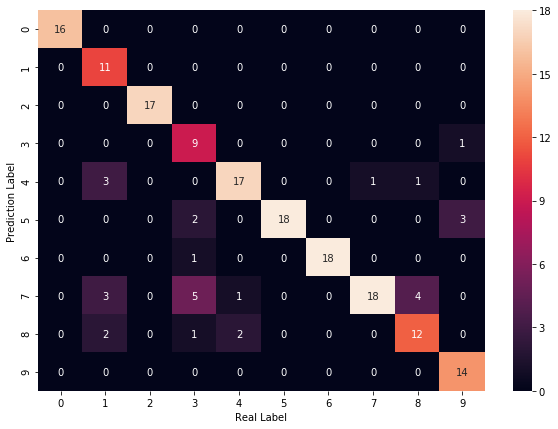

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:24 index:[5] real:5
#1 min_error:24 index:[2] real:2
#2 min_error:25 index:[7] real:8
#3 min_error:4 index:[0] real:0
#4 min_error:24 index:[1] real:1
#5 min_error:11 index:[7] real:7
#6 min_error:11 index:[6] real:6
#7 min_error:25 index:[3] real:3
#8 min_error:9 index:[2] real:2
#9 min_error:25 index:[1] real:1
#10 min_error:23 index:[7] real:7
#11 min_error:31 index:[8] real:4
#12 min_error:13 index:[6] real:6
#13 min_error:25 index:[3] real:3
#14 min_error:25 index:[1] real:1
#15 min_error:33 index:[8] real:3
#16 min_error:29 index:[5] real:9
#17 min_error:24 index:[1] real:1
#18 min_error:20 index:[7] real:7
#19 min_error:9 index:[6] real:6
#20 min_error:29 index:[8] real:8
#21 min_error:14 index:[4] real:4
#22 min_error:21 index:[3] real:3
#23 min_error:28 index:[1 7] real:1
#24 min_error:16 index:[4] real:4
#25 min_error:7 index:[0] real:0
#26 min_error:16 index:[5] real:5
#27 min_error:20 index:[3] real:3
#28 min_error:26 index:[6] real:6
#29 min_error:25 index:[9]

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8843537414965986
Avg Base Learner:0.8100803957946815


In [18]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2064 Total connections::2416


In [36]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(26)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    
    # the index of maximum in each line
    return px_outputs

In [41]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        pred_outputs = get_pred_real(i, j)
        pred.append(pred_outputs)
    
    error = []
    for i in range(10):
        loss = 0
        for ii in range(len(pred)):
            #print(number_codes[0][ii], pred[ii][0])
            #print (pred[ii][0][number_codes[0][ii]])
            #loss += (1 - pred[ii][0][number_codes[i][ii]])**2
            z = pred[ii][0][number_codes[i][ii]]
            
            #loss += np.log(1 + np.exp(-z)) # c45
            #loss += np.exp(-z)# adaboost
            loss += (1-z)**2
        error.append(loss)
    
    pred_value.append(np.where(error==np.min(error)))

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8111111111111111